### project to analyzing order data from Uber China
### project for fun

In [1]:
library(tidyverse) # load tidyverse
library('scales') # load scales for calculating rate

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.2     √ purrr   0.3.4
√ tibble  3.0.3     √ dplyr   1.0.0
√ tidyr   1.1.0     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




In [2]:
order_df <- "order.csv" %>% 
  read_csv() 
# read data from the csv file and make a dataframe named order_df

Parsed with column specification:
cols(
  order_id = col_double(),
  passenger_id = col_double(),
  call_time = col_character(),
  grab_time = col_character(),
  cancel_time = col_character(),
  finish_time = col_character()
)



In [4]:
order_df %>% glimpse() # have a quick glimpse about the dataframe

Rows: 297
Columns: 6
$ order_id     <dbl> 7.036883e+13, 7.036883e+13, 7.036883e+13, 7.036883e+13...
$ passenger_id <dbl> 7.036875e+13, 7.036875e+13, 7.036875e+13, 7.036875e+13...
$ call_time    <chr> "2018/3/10 9:09", "2018/3/6 6:54", "2018/3/9 7:35", "2...
$ grab_time    <chr> "2018/3/10 9:09", "2018/3/6 6:54", "2018/3/9 7:37", "2...
$ cancel_time  <chr> "1971/1/1 0:00", "1971/1/1 0:00", "1971/1/1 0:00", "20...
$ finish_time  <chr> "2018/3/10 9:37", "2018/3/6 7:29", "2018/3/9 7:54", "1...


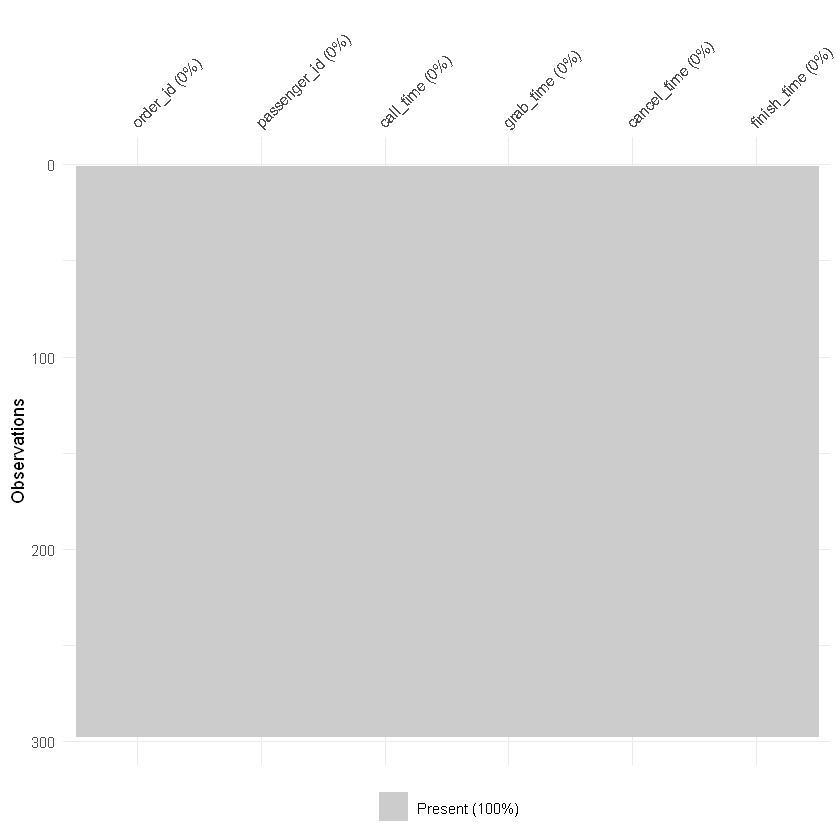

In [5]:
library(visdat)
# load visdat, give quick access to visualization of bike_df

order_df %>% 
  vis_miss() # provides a custom plot for missing data
# As we can see from the graph, there is no missing value, which is good

In [6]:
library(skimr) #load library skimr
order_df %>%
  skim() # output a quick summary of the dataset

-- Data Summary ------------------------
                           Values    
Name                       Piped data
Number of rows             297       
Number of columns          6         
_______________________              
Column type frequency:               
  character                4         
  numeric                  2         
________________________             
Group variables            None      

-- Variable type: character ----------------------------------------------------
# A tibble: 4 x 8
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
* <chr>             <int>         <dbl> <int> <int> <int>    <int>      <int>
1 call_time             0             1    13    15     0      289          0
2 grab_time             0             1    13    15     0      213          0
3 cancel_time           0             1    13    15     0      140          0
4 finish_time           0             1    13    15     0      139          0

-- Variabl

In [7]:
library(lubridate) # load lubridate to change time zone


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [8]:
std_order_df <- order_df %>%
  mutate(call_date = as.POSIXct(call_time)) %>%
  mutate(grab_date = as.POSIXct(grab_time)) %>%
  mutate(cancel_date = as.POSIXct(cancel_time)) %>%
  mutate(finish_date = as.POSIXct(finish_time))
# create new column named call_date for converting time zone 

In [9]:
std_order_df %>%
   select(-call_time, -grab_time, -cancel_time, -finish_time) -> std_order_df # drop character and keep datetime 

In [10]:
ymd_hms(std_order_df$call_date, tz = "Asia/Shanghai") %>%
  with_tz("America/Sao_Paulo") ->calldate
ymd_hms(std_order_df$grab_date, tz = "Asia/Shanghai") %>%
  with_tz("America/Sao_Paulo") ->grabdate
ymd_hms(std_order_df$cancel_date, tz = "Asia/Shanghai") %>%
  with_tz("America/Sao_Paulo") ->canceldate
ymd_hms(std_order_df$finish_date, tz = "Asia/Shanghai") %>%
  with_tz("America/Sao_Paulo") ->finishdate
# convert call time, grab time, cancel time and finish time into Brazil time zone

In [11]:
std_order_df <- std_order_df %>% 
  mutate(call_date = calldate) %>% 
  mutate(grab_date = grabdate) %>%
  mutate(cancel_date = canceldate) %>%
  mutate(finish_date = finishdate)

# replace data by Brazil 
# we can look at first 6 rows of dataframe to see if the converting is successful.
# all the date is replaced by Brazil time

In [12]:
std_order_df %>% head() # a data frame in Brazil time zone

order_id,passenger_id,call_date,grab_date,cancel_date,finish_date
<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<dttm>
7.036883e+13,7.036875e+13,2018-03-09 22:09:00,2018-03-09 22:09:00,1970-12-31 13:00:00,2018-03-09 22:37:00
7.036883e+13,7.036875e+13,2018-03-05 19:54:00,2018-03-05 19:54:00,1970-12-31 13:00:00,2018-03-05 20:29:00
7.036883e+13,7.036875e+13,2018-03-08 20:35:00,2018-03-08 20:37:00,1970-12-31 13:00:00,2018-03-08 20:54:00
7.036883e+13,7.036875e+13,2018-03-05 16:31:00,2018-03-05 16:31:00,2018-03-05 16:32:00,1970-12-31 13:00:00
7.036883e+13,7.036875e+13,2018-03-05 16:32:00,2018-03-05 16:33:00,2018-03-05 16:34:00,1970-12-31 13:00:00
7.036883e+13,7.036875e+13,2018-03-08 13:49:00,2018-03-08 13:49:00,2018-03-08 13:50:00,1970-12-31 13:00:00


<div class="alert-success">
1. check the response rate and complete rate
</div>

In [13]:
library(tibbletime) # load library tibbletime to convert Beijing time to Brazil time

Warning message:
"package 'tibbletime' was built under R version 4.0.3"

Attaching package: 'tibbletime'


The following object is masked from 'package:stats':

    filter




In [14]:
# response rate = the amount of response / the number of orders from customers

call_num <-std_order_df  %>% 
  select(call_date) %>% # select the column call_date
  nrow() #the number of calling
ans_num <- std_order_df %>% 
  filter(year(grab_date)!=1970) %>% # filter out the data with "1970" since it is not valid 
  nrow() # the number of response

response_rate <- ans_num/call_num
response_rate
percent(response_rate) #response rate

[1] 0.7239057

[1] "72%"

#### complete rate is 72.39%

In [15]:
# complete rate = the amount of complete order / the number of order from customers

finish_num <- std_order_df %>% 
  filter(year(finish_date)!=1970) %>% # filter out the data with "1970" since it is not valid 
  nrow() # the number of finished order

finish_rate = finish_num/call_num # # 完单率 = 完成订单/呼叫订单
finish_rate
percent(finish_rate)

[1] 0.4713805

[1] "47%"

#### complete rate 47.13%

<div class="alert-success">
2. how long is the response time？
</div>

In [16]:

# reponse time = the period of time betweeen order is placed and the order is picked / answered order amount
# the period of time between order is placed and the order is picked = picked time - ordered time

std_date_df <- std_order_df %>% 
  filter(year(grab_date)!=1970) # make a new dataframe with valid year only

std_date_df$interval <- difftime(std_date_df$grab_date,std_date_df$call_date,units = "secs") 
# the period of time between order is placed and the order is picked = picked time - ordered time
# create a column named interval to store the response time interval

response_sum <- sum(std_date_df$interval)/ans_num # reponse time = the period of time betweeen order is placed and the order is picked / answered order amount
response_sum

Time difference of 43.53488 secs

#### response time is 43.53 sec

<div class="alert-success">
3. from the dataset, check which hour is the peak, and the lowest period
<div class="alert-success">

In [17]:
# we may need to create another column named call_hour to store the hour of call_date
# As we have already transfered from Beijing time to Brazil time, working on dataframe std_order_df is enough.

std_order_df$call_hour <- hour(std_order_df$call_date) # extract hour only from call_date to create call_hour
std_order_df %>% 
  group_by(call_hour) %>% # group by call_hour 
  summarise(max_id = max(order_id),count = n()) %>% # summarise by max order id and count the frequency
  select(-max_id) %>% # drop redundant column
  top_n(1, count) # 1 means decreasing order

`summarise()` ungrouping output (override with `.groups` argument)



call_hour,count
<int>,<int>
18,40


In [18]:
std_order_df$call_hour <- hour(std_order_df$call_date) # extract hour only from call_date to create call_hour
std_order_df %>% 
  group_by(call_hour) %>% 
  summarise(max_id = max(order_id),count = n()) %>%
  select(-max_id) %>% # drop redundant column
  top_n(-1, count) # -1 means increasing order

`summarise()` ungrouping output (override with `.groups` argument)



call_hour,count
<int>,<int>
2,1
3,1


<div class="alert-success">
4. the people placed the order and continue to place the order in the second day
</div>

In [19]:
# the ratio of people continue using the App in the second dat = the number of users who continued use in the second day / the total order
# we need to find the day interval with 1
# first extract day from call_date
std_order_df$date <- as.Date(std_order_df$call_date, format = "%Y-%m-%d") 
std_order_df %>% distinct(order_id, date) -> df1 # distinct a dataframe with date
std_order_df %>% distinct(order_id, date) -> df2

df1 %>%
  inner_join(df2, by = c("order_id" = "order_id")) %>% # join them to see whether the same user have differenct call date
  filter(difftime(date.y, date.x, units="days") == 1) %>% # filter out the date in second day
  nrow() -> call_second # the amount of calling in second day named call_second

call_second/call_num # the ratio of people continue using the App in the second dat = the number of users who continued use in the second day / the total order

# interesting, I am actually stuck on this for a while but I cannot find an error in my code. Is it about the logic I got wrong?

[1] 0


## Thanks for your time and have a good day!